In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date


In [12]:
# Define the ticker symbol
tickerSymbol = 'SMH'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2022-1-1', end=date.today())

In [13]:
CL = history['Low'].shift(-1) / history['Close'] - 1
print(f'{tickerSymbol} Close to next Low median {CL.median():.2%}')

SMH Close to next Low median -2.69%


In [14]:
max_weeks = 50

gap = (5/205)*100
# option_prices = {
#     # 1: [210/2.21, 220/2.93, 220/2.36], # very negative
#     2: [210/3.72, 220/4.25, 220/3.92],
#     3: [210/4.7, 220/5.43, 220/6.05],
#     4: [210/5.6, 220/7.45, 220/6.72],
#     5: [210/7.5, 220/7.9, 220/7.55],
#     6: [210/7.85, 220/8.9, 220/8.55],
#     7: [220/9.23],
#     8: [220/10.27],
#     9: [210/9.82],
#     11: [220/11.85],
#     12: [220/12.82],
#     13: [210/12.05],
#     15: [220/14.27],
#     16: [220/15.12],
#     17: [210/14.35],
#     20: [220/17.02],
#     21: [220/17.4],
#     22: [210/16.75],
#     28: [220/21.72],
#     29: [220/21.52],
#     30: [210/20.37],
#     33: [220/23.87],
#     34: [220/24.25],
#     35: [210/22.45],
#     37: [220/24.32],
#     38: [220/25.05],
#     39: [210/23.17]
# }
# print('option leverages:')
# for w in option_prices:
#     print(f'\t{w:2}w', *[f'{x:4.1f}' for x in option_prices[w]])

# option_leverage = {w:mean(option_prices[w]) for w in option_prices}
option_leverage={
 1: 69.08212560386474,
 2: 44.9288840262582,
 3: 37.0216306156406,
 4: 30.34021816881259,
 5: 28.398378582202113,
 6: 26.281148429035753,
 7: 22.37654320987654,
 8: 21.67766258246937,
 9: 21.041970271058,
 10: 19.48051948051948,
 11: 18.42837273991655,
 12: 17.046004842615012,
 13: 16.018897996357012,
 14: 15.845070422535212,
 15: 14.603616133518775,
 16: 14.427480916030534,
 17: 14.47280134196022,
 18: 13.575425596824996,
 19: 13.333333333333334,
 20: 12.151898734177216,
 21: 12.605605100821354,
 22: 12.5,
 23: 11.560283687943263,
 24: 11.12759643916914,
 25: 11.412571627018579,
 26: 10.978520286396181}
print('mean option leverage, break even:')
for w in option_leverage:
    print(f'\t{w:2}w {option_leverage[w]:4.1f} {gap + 100/option_leverage[w]:4.1f}%')
print(f'option gap: {gap:.2f}%')

mean option leverage, break even:
	 1w 69.1  3.9%
	 2w 44.9  4.7%
	 3w 37.0  5.1%
	 4w 30.3  5.7%
	 5w 28.4  6.0%
	 6w 26.3  6.2%
	 7w 22.4  6.9%
	 8w 21.7  7.1%
	 9w 21.0  7.2%
	10w 19.5  7.6%
	11w 18.4  7.9%
	12w 17.0  8.3%
	13w 16.0  8.7%
	14w 15.8  8.8%
	15w 14.6  9.3%
	16w 14.4  9.4%
	17w 14.5  9.3%
	18w 13.6  9.8%
	19w 13.3  9.9%
	20w 12.2 10.7%
	21w 12.6 10.4%
	22w 12.5 10.4%
	23w 11.6 11.1%
	24w 11.1 11.4%
	25w 11.4 11.2%
	26w 11.0 11.5%
option gap: 2.44%


In [15]:
stock_change = [None]
option_performance = []
for weeks in range(1, max_weeks):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    stock_change.append(stock_changes.median()  * 52 / weeks) # annualized

    if weeks in option_leverage:
        lvr = option_leverage[weeks]
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        mean_profit = option_profits.mean() #* 52 / weeks # annualized
        positive_percent = (option_profits > 0).mean() * 100
        option_performance.append([weeks, mean_profit, positive_percent])
        history[f'Option {weeks}w'] = option_profits # ? * 52 / weeks # annualized

In [16]:
print('Option performance (weeks, profit (p.a.), positive):')
for p in option_performance:
    print(f'\t{p[0]:2}w {p[1]:4.0f}% {p[2]:3.0f}%')

Option performance (weeks, profit (p.a.), positive):
	 1w  -26%  25%
	 2w  -11%  30%
	 3w    6%  34%
	 4w   10%  35%
	 5w   28%  39%
	 6w   38%  40%
	 7w   31%  41%
	 8w   40%  43%
	 9w   45%  46%
	10w   49%  49%
	11w   51%  48%
	12w   54%  50%
	13w   57%  52%
	14w   68%  54%
	15w   66%  55%
	16w   76%  58%
	17w   88%  56%
	18w   87%  56%
	19w   96%  59%
	20w   89%  59%
	21w  108%  60%
	22w  118%  61%
	23w  110%  61%
	24w  112%  61%
	25w  126%  62%
	26w  128%  62%


In [17]:
from file import save_file

save_file(tickerSymbol, option_performance)

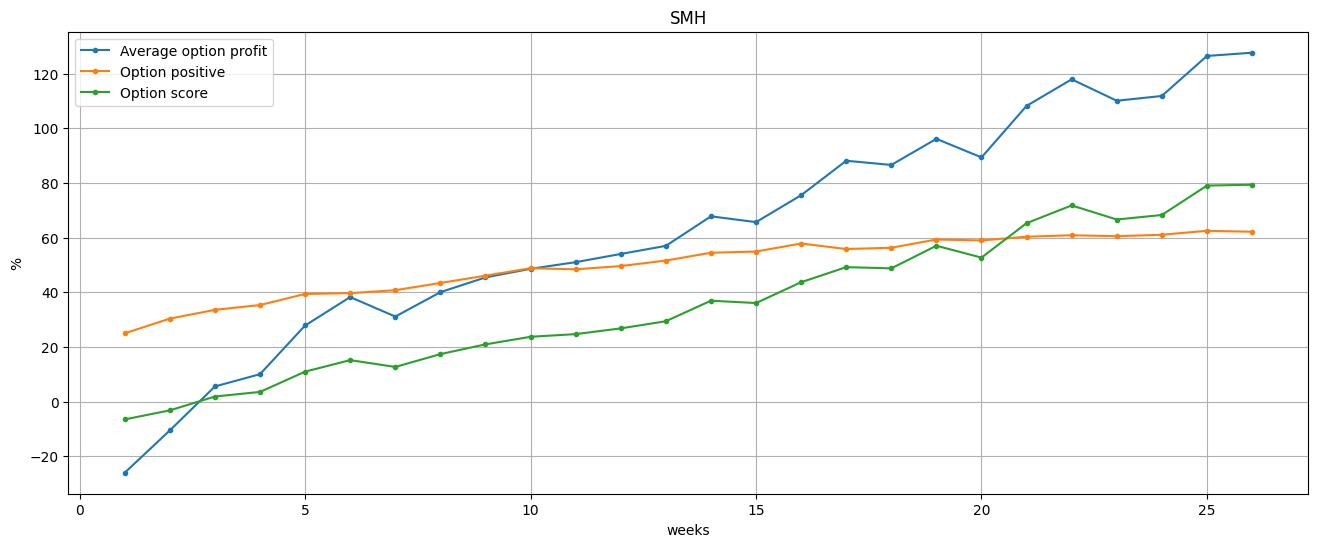

In [18]:
plt.figure(figsize=(16,6))
option_weeks = [p[0] for p in option_performance]
option_profit = [p[1] for p in option_performance]
option_positive = [p[2] for p in option_performance]
option_score = [x * y / 100 for x, y in zip(option_profit, option_positive)]
plt.plot(option_weeks, option_profit, label='Average option profit', marker='.')
plt.plot(option_weeks, option_positive, label='Option positive', marker='.')
plt.plot(option_weeks, option_score, label='Option score', marker='.')
plt.legend(loc='upper left')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('%')
plt.grid()
plt.show()

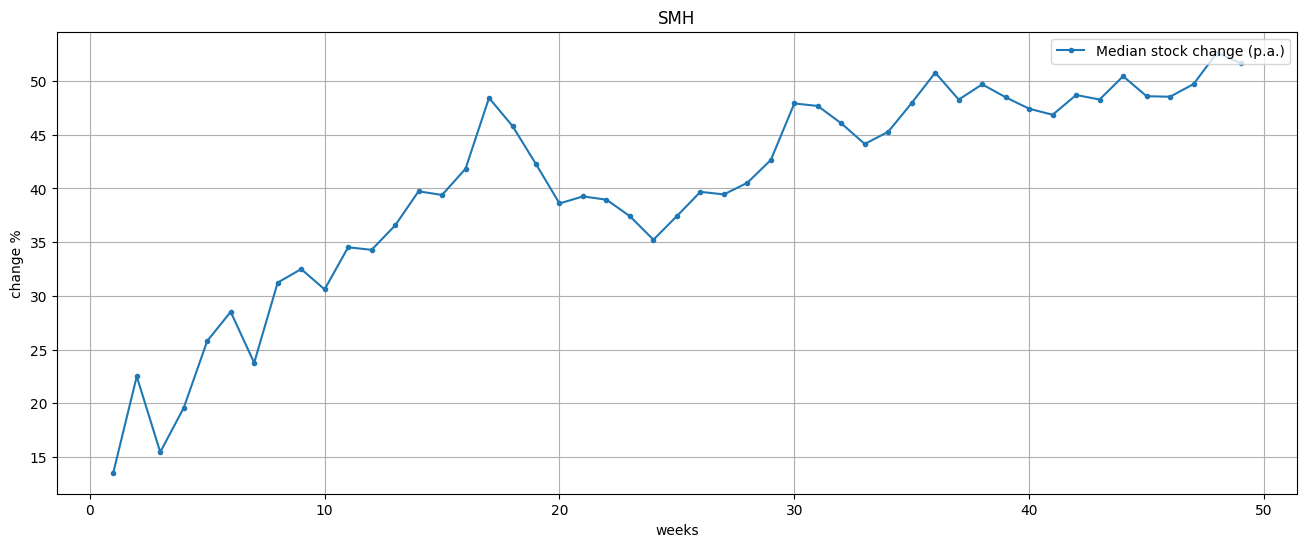

In [19]:
opt = [c * option_leverage[w] - 100 * 52 / w if w in option_leverage else None for w, c in enumerate(stock_change)]

plt.figure(figsize=(16,6))
plt.plot(stock_change, label='Median stock change (p.a.)', marker='.')
# plt.plot(opt, label='Median option gain (p.a.)', marker='.')
plt.legend(loc='upper right')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('change %')
plt.grid()
plt.show()


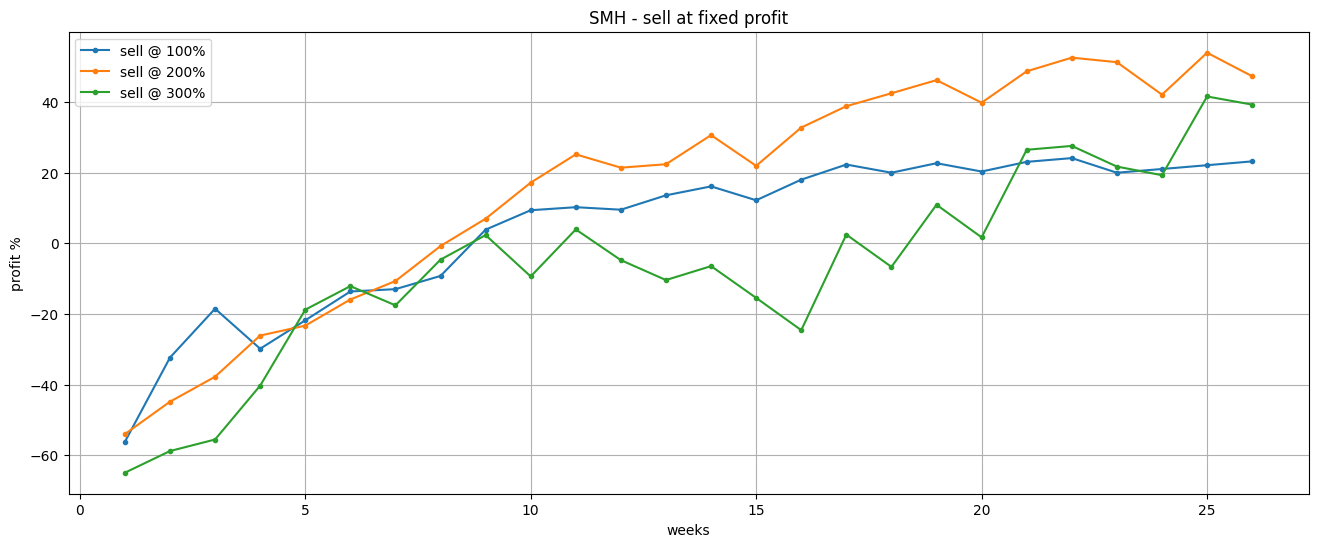

In [20]:
plt.figure(figsize=(16,6))

for percent in [100,200,300]:
    data = {}
    for weeks in option_leverage:
        lvr = option_leverage[weeks]
        window_max = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()
        wmax = (((window_max / history['Open'] - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
        wmax = wmax.dropna()
        q = (wmax >= percent).mean()
        data[weeks] = q * (percent + 100) - 100

    plt.plot(*zip(*sorted(data.items())), label=f'sell @ {percent}%', marker='.')

plt.legend(loc='best')
plt.title(f'{tickerSymbol} - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()